<a href="https://colab.research.google.com/github/paolala24/proyecto_final/blob/main/construyendo_se%C3%B1ales_iq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, bode, TransferFunction
from scipy.fftpack import fft, fftfreq


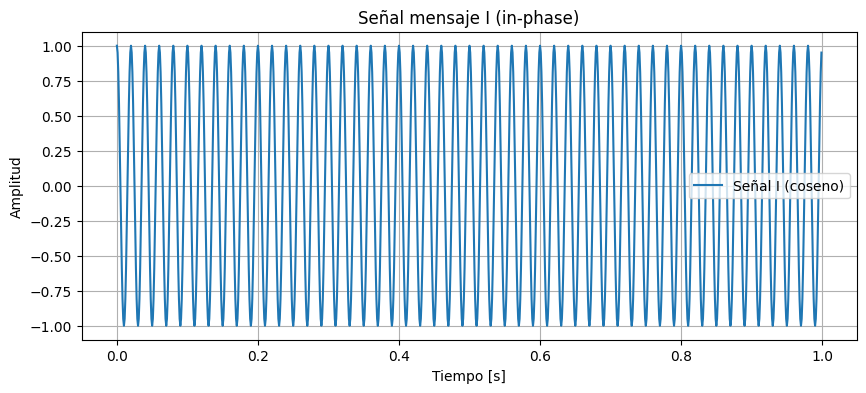

In [8]:
# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo (1 segundo)
f0 = 50  # Frecuencia de la señal mensaje (Hz)

# Señal I (in-phase)
I = np.cos(2 * np.pi * f0 * t)

# Graficar la señal I
plt.figure(figsize=(10, 4))
plt.plot(t, I, label='Señal I (coseno)')
plt.title('Señal mensaje I (in-phase)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


Esta gráfica muestra la señal I, una señal cosenoidal de 50 Hz que tomamos como mensaje. Es la componente "in-phase" (en fase) de un sistema I/Q. Se observa claramente su periodicidad dentro del segundo de duración.

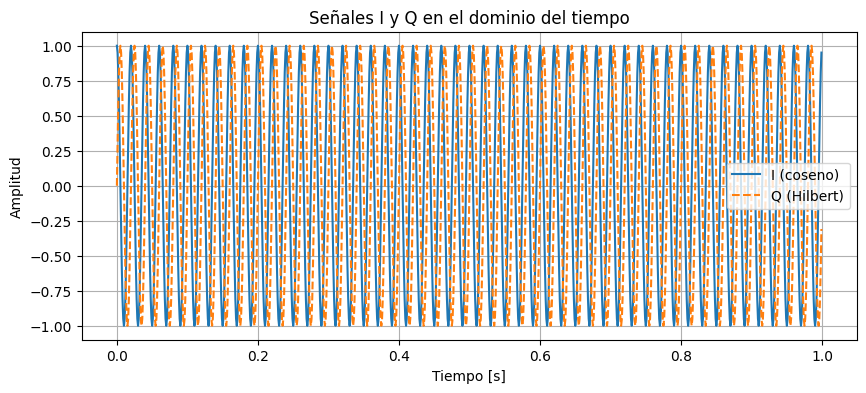

In [9]:
# Aplicar la transformada de Hilbert
analytic_signal = hilbert(I)
Q = np.imag(analytic_signal)  # Señal en cuadratura

# Graficar I y Q juntas
plt.figure(figsize=(10, 4))
plt.plot(t, I, label='I (coseno)')
plt.plot(t, Q, label='Q (Hilbert)', linestyle='--')
plt.title('Señales I y Q en el dominio del tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


Aquí se observan las dos señales: I (coseno) y Q (seno, obtenida por la transformada de Hilbert). Visualmente se nota que están desfasadas 90°, lo cual es característico de un par I/Q. Esta propiedad es utilizada en modulación en cuadratura y procesamiento de señales.

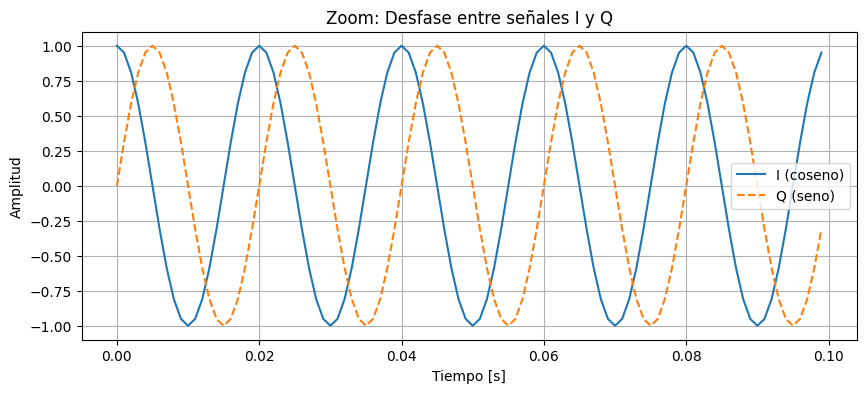

In [10]:
# Zoom para mostrar el desfase entre I y Q
plt.figure(figsize=(10, 4))
plt.plot(t[:100], I[:100], label='I (coseno)')
plt.plot(t[:100], Q[:100], label='Q (seno)', linestyle='--')
plt.title('Zoom: Desfase entre señales I y Q')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


Se realiza un zoom sobre los primeros 100 puntos (equivalentes a 0.1 segundos) para resaltar el desfase de 90° entre la señal I y la señal Q. Se puede ver que cuando la señal I está en su punto máximo, la señal Q está cruzando por cero, lo cual confirma este desfase.

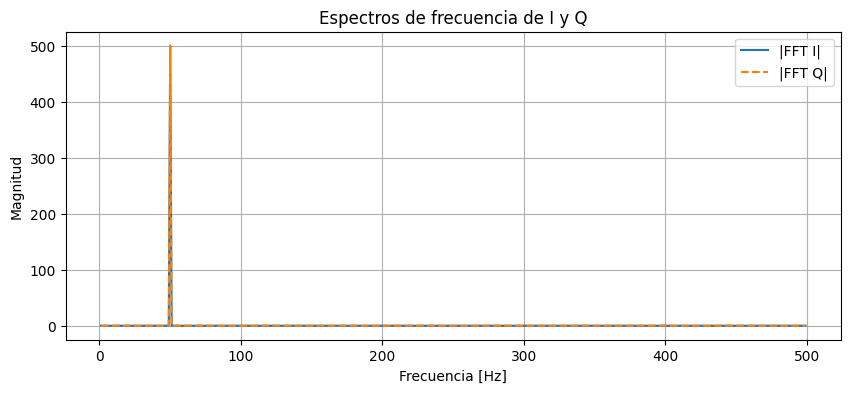

In [11]:
# Calcular la FFT
I_fft = np.abs(fft(I))
Q_fft = np.abs(fft(Q))
freqs = fftfreq(len(t), 1/fs)

# Tomar solo la mitad positiva del espectro
half = freqs > 0

# Graficar espectros
plt.figure(figsize=(10, 4))
plt.plot(freqs[half], I_fft[half], label='|FFT I|')
plt.plot(freqs[half], Q_fft[half], label='|FFT Q|', linestyle='--')
plt.title('Espectros de frecuencia de I y Q')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.show()


Esta gráfica muestra el espectro de frecuencia (FFT) de ambas señales. Ambas tienen un pico en la misma frecuencia (50 Hz), lo que indica que son versiones defasadas de la misma señal. La transformada de Hilbert no cambia la magnitud del espectro, solo su fase.



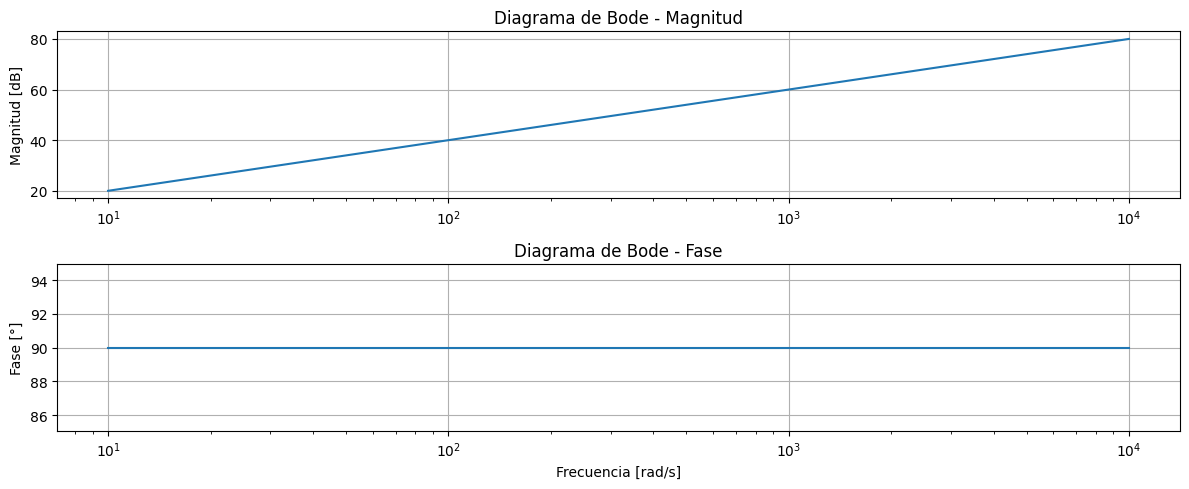

In [12]:
# Un filtro Hilbert ideal es de fase -90° en banda positiva, +90° en banda negativa (fase no lineal)
# Como referencia, usaremos un sistema de fase constante de -90° para visualizar

# Crear un sistema con fase de -90° (solo para visualización)
w = np.logspace(1, 4, 1000)  # Frecuencia angular
system = TransferFunction([1, 0], [1])  # Sistema derivador (fase -90°)
w, mag, phase = bode(system, w=w)

# Graficar Bode
plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title('Diagrama de Bode - Magnitud')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.title('Diagrama de Bode - Fase')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [rad/s]')
plt.grid(True)

plt.tight_layout()
plt.show()


Este diagrama de Bode es una referencia teórica de cómo se comportaría un filtro Hilbert ideal: mantiene la magnitud constante (como un pasa todo) y genera un desfase de -90° constante sobre las frecuencias positivas. Es útil para entender la operación de cambio de fase que realiza la transformada de Hilbert.

Discusión:

En este primer ejercicio construimos las señales I/Q a partir de una señal senoidal. Usamos la Transformada de Hilbert para obtener la componente en cuadratura (Q), la cual presenta un desfase de 90° con respecto a la señal original (I). Este desfase es esencial en aplicaciones como modulación en cuadratura o comunicaciones digitales. Observamos este desfase tanto en el dominio del tiempo como en el espectro de frecuencia. Además, se mostró cómo sería teóricamente el diagrama de Bode de un filtro Hilbert, el cual presenta una fase constante de -90° en la banda positiva. Todo esto es clave para comprender cómo separar o manipular componentes en fase y cuadratura en sistemas reales.